## Step 01: Load the Dataset

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Titanic Dataset

Dataset = pd.read_csv(r"D:\ipec\Datas\titanic.csv")
Dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Step 02: Data Cleaning

### Check for Missing Values

In [3]:
# Check Missing Values

Dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handle Missing Values

In [4]:
# Fill missing 'Age' with Median
Dataset["Age"].fillna(Dataset['Age'].median(), inplace=True)

# Fill missing 'Embarked' with Mode
Dataset["Embarked"].fillna(Dataset['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column (too many missing values)
Dataset.drop('Cabin', axis=1, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3000\3070386318.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset["Age"].fillna(Dataset['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3000\3070386318.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


## Step 03: Feature Understanding (Data Types & Categories)

In [5]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
# Basic Statistics for numerical columns
Dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Unique values for categorical columns
print(Dataset['Sex'].unique())
print(Dataset['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


## Step 04: Univariate Analysis (Distribution of Single Features)

### 4.1 Survival Count

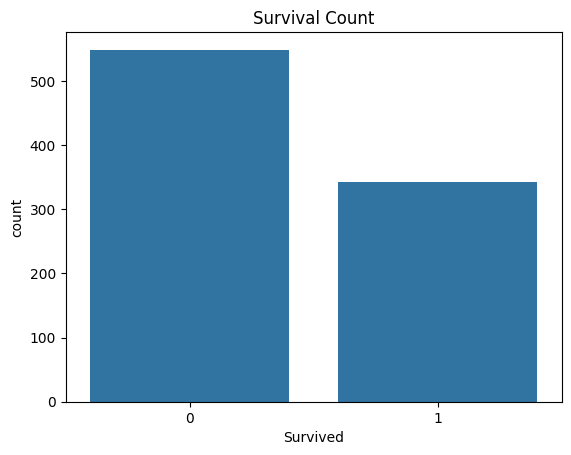

In [8]:
sns.countplot(x='Survived', data=Dataset)
plt.title('Survival Count')
plt.show()

### 4.2 Calss Distribution

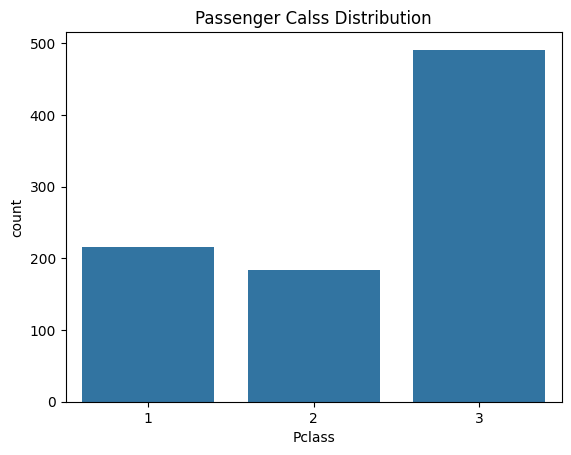

In [9]:
sns.countplot(x='Pclass', data=Dataset)
plt.title('Passenger Calss Distribution')
plt.show()

### 4.3 Gender Distribution 

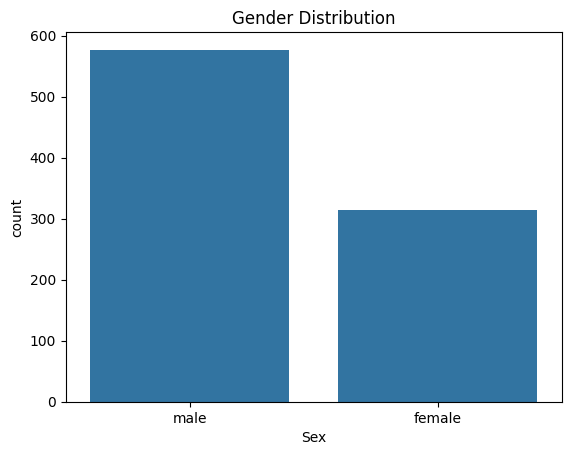

In [10]:
sns.countplot(x='Sex', data=Dataset)
plt.title("Gender Distribution")
plt.show()

### 4.4 Age Distribution

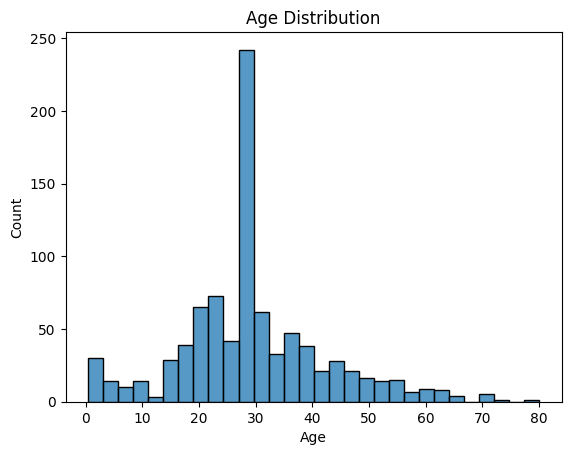

In [11]:
sns.histplot(Dataset['Age'], bins=30)
plt.title('Age Distribution')
plt.show()

## Step 05: Bivariate Analysis (Feature & Target)

### 5.1 Survival Rate by Gender

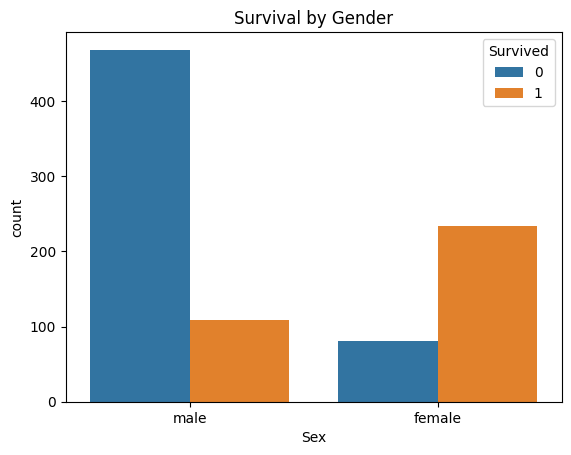

In [12]:
sns.countplot(x='Sex', hue='Survived', data=Dataset)
plt.title('Survival by Gender')
plt.show()

### 5.2 Survival Rate by Passenger class

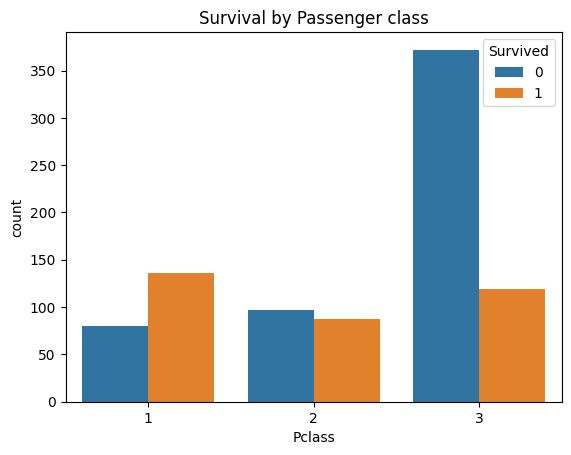

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=Dataset)
plt.title('Survival by Passenger class')
plt.show()

### 5.3 Age vs Survival (Boxplot)

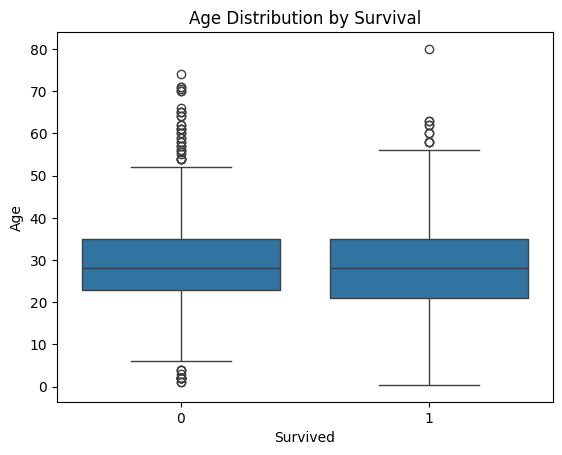

In [14]:
sns.boxplot(x='Survived', y='Age', data=Dataset)
plt.title('Age Distribution by Survival')
plt.show()

##  Step 06: Correlation Heatmap

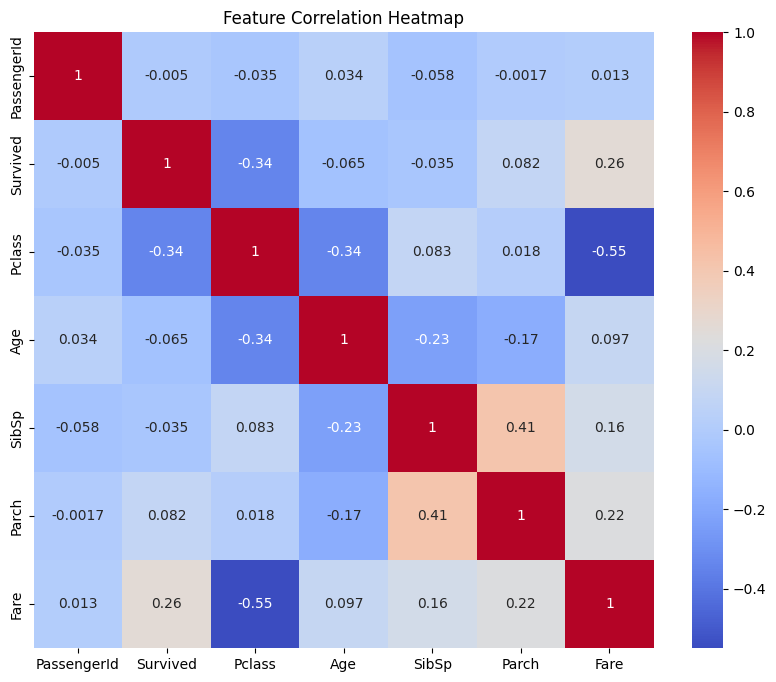

In [15]:
plt.figure(figsize=(10,8))

# Select only numerical columns
numeric_df = Dataset.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title('Feature Correlation Heatmap')
plt.show()


# Logistic Regression

## Step 01: Data Preparation

In [18]:
# Drop irrelevent columns
Dataset = Dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

# Quick Check
Dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Step 02: Handle Categorical Variables (Lable Encoding)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' And 'Embarked'
le = LabelEncoder()
Dataset['Sex'] = le.fit_transform(Dataset['Sex'])
Dataset['Embarked'] = le.fit_transform(Dataset['Embarked'])

Dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Step 03: Split Features and Target

In [20]:
# SelectFeature and Target
x = Dataset.drop('Survived', axis=1)
y = Dataset['Survived']

## Step 04: Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

# Split the Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

print("Training Data shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

Training Data shape: (712, 7)
Testing Data Shape: (179, 7)


## Step 05: Build and Train Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

## Step 06: Model Prediction

In [23]:
# Make Predictions
y_pred = model.predict(x_test)

## Step 07: Model Evaluation

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



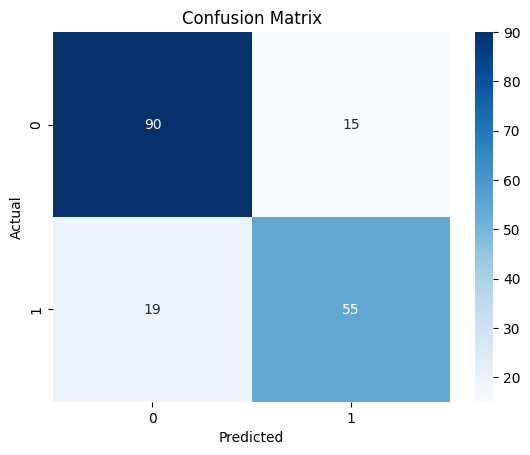

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Performance Report 
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()